In [13]:
import pandas as pd
medicare = pd.read_csv("/netapp2/home/se197/RPDR/Josh Lin/3_EHR_V2/CMS/Data/final_medicare.csv")

In [14]:
train_set = medicare[medicare.Hospital != 'BWH'] # MGH
validation_set = medicare[medicare.Hospital == 'BWH'] # BWH and Neither 
import numpy as np

fifty_perc_EHR_cont = np.percentile(medicare['Cal_MPEC_R0'],50)
train_set_high = train_set[train_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
train_set_low= train_set[train_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]

validation_set_high = validation_set[validation_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
validation_set_low = validation_set[validation_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]


In [15]:
predictor_variable = [
        'Co_CAD_R0', 'Co_Embolism_R0', 'Co_DVT_R0', 'Co_PE_R0', 'Co_AFib_R0',
        'Co_Hypertension_R0', 'Co_Hyperlipidemia_R0', 'Co_Atherosclerosis_R0',
        'Co_HF_R0', 'Co_HemoStroke_R0', 'Co_IscheStroke_R0', 'Co_OthStroke_R0',
        'Co_TIA_R0', 'Co_COPD_R0', 'Co_Asthma_R0', 'Co_Pneumonia_R0', 'Co_Alcoholabuse_R0',
        'Co_Drugabuse_R0', 'Co_Epilepsy_R0', 'Co_Cancer_R0', 'Co_MorbidObesity_R0',
        'Co_Dementia_R0', 'Co_Depression_R0', 'Co_Bipolar_R0', 'Co_Psychosis_R0',
        'Co_Personalitydisorder_R0', 'Co_Adjustmentdisorder_R0', 'Co_Anxiety_R0',
        'Co_Generalizedanxiety_R0', 'Co_OldMI_R0', 'Co_AcuteMI_R0', 'Co_PUD_R0',
        'Co_UpperGIbleed_R0', 'Co_LowerGIbleed_R0', 'Co_Urogenitalbleed_R0',
        'Co_Othbleed_R0', 'Co_PVD_R0', 'Co_LiverDisease_R0', 'Co_MRI_R0',
        'Co_ESRD_R0', 'Co_Obesity_R0', 'Co_Sepsis_R0', 'Co_Osteoarthritis_R0',
        'Co_RA_R0', 'Co_NeuroPain_R0', 'Co_NeckPain_R0', 'Co_OthArthritis_R0',
        'Co_Osteoporosis_R0', 'Co_Fibromyalgia_R0', 'Co_Migraine_R0', 'Co_Headache_R0',
        'Co_OthPain_R0', 'Co_GeneralizedPain_R0', 'Co_PainDisorder_R0',
        'Co_Falls_R0', 'Co_CoagulationDisorder_R0', 'Co_WhiteBloodCell_R0', 'Co_Parkinson_R0',
        'Co_Anemia_R0', 'Co_UrinaryIncontinence_R0', 'Co_DecubitusUlcer_R0',
        'Co_Oxygen_R0', 'Co_Mammography_R0', 'Co_PapTest_R0', 'Co_PSATest_R0',
        'Co_Colonoscopy_R0', 'Co_FecalOccultTest_R0', 'Co_FluShot_R0', 'Co_PneumococcalVaccine_R0', 'Co_RenalDysfunction_R0', 'Co_Valvular_R0', 'Co_Hosp_Prior30Days_R0',
        'Co_RX_Antibiotic_R0', 'Co_RX_Corticosteroid_R0', 'Co_RX_Aspirin_R0', 'Co_RX_Dipyridamole_R0',
        'Co_RX_Clopidogrel_R0', 'Co_RX_Prasugrel_R0', 'Co_RX_Cilostazol_R0', 'Co_RX_Ticlopidine_R0',
        'Co_RX_Ticagrelor_R0', 'Co_RX_OthAntiplatelet_R0', 'Co_RX_NSAIDs_R0',
        'Co_RX_Opioid_R0', 'Co_RX_Antidepressant_R0', 'Co_RX_AAntipsychotic_R0', 'Co_RX_TAntipsychotic_R0',
        'Co_RX_Anticonvulsant_R0', 'Co_RX_PPI_R0', 'Co_RX_H2Receptor_R0', 'Co_RX_OthGastro_R0',
        'Co_RX_ACE_R0', 'Co_RX_ARB_R0', 'Co_RX_BBlocker_R0', 'Co_RX_CCB_R0', 'Co_RX_Thiazide_R0',
        'Co_RX_Loop_R0', 'Co_RX_Potassium_R0', 'Co_RX_Nitrates_R0', 'Co_RX_Aliskiren_R0',
        'Co_RX_OthAntihypertensive_R0', 'Co_RX_Antiarrhythmic_R0', 'Co_RX_OthAnticoagulant_R0',
        'Co_RX_Insulin_R0', 'Co_RX_Noninsulin_R0', 'Co_RX_Digoxin_R0', 'Co_RX_Statin_R0',
        'Co_RX_Lipid_R0', 'Co_RX_Lithium_R0', 'Co_RX_Benzo_R0', 'Co_RX_ZDrugs_R0',
        'Co_RX_OthAnxiolytic_R0', 'Co_RX_Barbiturate_R0', 'Co_RX_Dementia_R0', 'Co_RX_Hormone_R0',
        'Co_RX_Osteoporosis_R0', 'Co_N_Drugs_R0', 'Co_N_Hosp_R0', 'Co_Total_HospLOS_R0',
        'Co_N_MDVisit_R0', 'Co_RX_AnyAspirin_R0', 'Co_RX_AspirinMono_R0', 'Co_RX_ClopidogrelMono_R0',
        'Co_RX_AspirinClopidogrel_R0', 'Co_RX_DM_R0', 'Co_RX_Antipsychotic_R0'
]

co_train_gpop = train_set[predictor_variable]
co_train_high = train_set_high[predictor_variable]
co_train_low = train_set_low[predictor_variable]

co_validation_gpop = validation_set[predictor_variable]
co_validation_high = validation_set_high[predictor_variable]
co_validation_low = validation_set_low[predictor_variable]

In [16]:
out_train_cardio_gpop = train_set['Out_comp_cardiovascular_RC1']
out_train_cardio_high = train_set_high['Out_comp_cardiovascular_RC1']
out_train_cardio_low = train_set_low['Out_comp_cardiovascular_RC1']

out_validation_cardio_gpop = validation_set['Out_comp_cardiovascular_RC1']
out_validation_cardio_high = validation_set_high['Out_comp_cardiovascular_RC1']
out_validation_cardio_low = validation_set_low['Out_comp_cardiovascular_RC1']

In [17]:
def lr(X_train, y_train):
    from sklearn.linear_model import Lasso
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler 

    model = LogisticRegression()
    param_grid = [
        {'C' : np.logspace(-4, 4, 20)}
        ]
    clf = GridSearchCV(model, param_grid, cv = 5, verbose = True, n_jobs = -1)
    best_clf = clf.fit(X_train, y_train)
    return best_clf

In [18]:
def scores(X_train,y_train):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import roc_auc_score 
    from sklearn.metrics import log_loss

    pred = best_clf.predict(X_train)
    actual = y_train
    print(accuracy_score(actual,pred))
    print(f1_score(actual,pred))
    print(fbeta_score(actual,pred, average = 'macro', beta = 2))
    print(roc_auc_score(actual, best_clf.predict_proba(X_train)[:,1]))
    print(log_loss(actual,best_clf.predict_proba(X_train)[:,1]))
    
    


In [19]:
def cross_val(X,y):
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import log_loss
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import fbeta_score
    import sklearn
    import numpy as np
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    log_loss = [] 
    auc = [] 
    accuracy = [] 
    f1 = [] 
    f2 = [] 
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model = lr(X_train, y_train)
        prob = model.predict_proba(X_test)[:,1] # prob is a vector of probabilities 
        print(prob)
        pred = np.round(prob) # pred is the rounded predictions 
        
        log_loss.append(sklearn.metrics.log_loss(y_test, prob))
        auc.append(sklearn.metrics.roc_auc_score(y_test, prob))
        accuracy.append(sklearn.metrics.accuracy_score(y_test, pred))
        f1.append(sklearn.metrics.f1_score(y_test, pred, average = 'macro'))
        f2.append(fbeta_score(y_test,pred, average = 'macro', beta = 2))
    print(np.mean(accuracy))
    print(np.mean(f1))
    print(np.mean(f2))
    print(np.mean(auc))
    print(np.mean(log_loss))

In [37]:
best_clf = lr(co_train_gpop, out_train_cardio_gpop)
#scores(co_train_gpop, out_train_cardio_gpop)
#print()
#scores(co_validation_gpop, out_validation_cardio_gpop)
g_pred = best_clf.predict_proba(co_validation_gpop)
#comb = [] 
#for i in range(len(predictor_variable)):
    #comb.append(predictor_variable[i] + str(best_clf.best_estimator_.coef_[:,i:i+1]))
#comb

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
best_clf = lr(co_train_low, out_train_cardio_low)
#scores(co_train_low, out_train_cardio_low)
#print()
#scores(co_validation_low, out_validation_cardio_low)
l_pred = best_clf.predict_proba(co_validation_low)

#comb = [] 
#for i in range(len(predictor_variable)):
    #comb.append(predictor_variable[i] + str(best_clf.best_estimator_.coef_[:,i:i+1]))
#comb

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 20 candidates, totalling 100 fits
9578


/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
import pandas as pd
import numpy as np
import scipy.stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=np.float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=np.float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Operating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=np.float)
    ty = np.empty([k, n], dtype=np.float)
    tz = np.empty([k, m + n], dtype=np.float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    return order, label_1_count


def delong_roc_variance(ground_truth, predictions):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov


def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Computes log(p-value) for hypothesis that two ROC AUCs are different
    Args:
       ground_truth: np.array of 0 and 1
       predictions_one: predictions of the first model,
          np.array of floats of the probability of being class 1
       predictions_two: predictions of the second model,
          np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = np.vstack((predictions_one, predictions_two))[:, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    return calc_pvalue(aucs, delongcov)


In [41]:
#print(10 ** delong_roc_test(out_validation_cardio_gpop, l_pred, g_pred))

In [42]:
#10 ** delong_roc_test(out_validation_cardio_gpop, h_pred, g_pred)

In [43]:
#10 ** delong_roc_test(out_validation_cardio_gpop, h_pred, l_pred)

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 

gpop_fpr, gpop_tpr, _ = roc_curve(out_validation_cardio_gpop, g_pred[:,1])
high_fpr, high_tpr, _ = roc_curve(out_validation_cardio_high, h_pred)
low_fpr, low_tpr, _ = roc_curve(out_validation_cardio_low, l_pred[:,1])


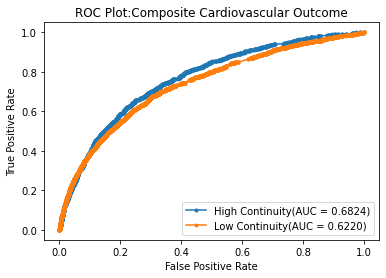

In [48]:
#plt.plot(gpop_fpr,gpop_tpr , marker ='.', label='General Population (AUC = %0.4f)' % 0.7543)
plt.plot(high_fpr, high_tpr, marker='.', label='High Continuity(AUC = %0.4f)' % 0.6824)
plt.plot(low_fpr, low_tpr, marker='.', label='Low Continuity(AUC = %0.4f)' % 0.6220)
#plt.plot(gpop_fpr, gpop_tpr, marker='.', label='General Continuity(AUC = %0.4f)' % 0.8297)

# Title
plt.title('ROC Plot:Composite Cardiovascular Outcome')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
len(h_pred)